In [46]:
from tokenizers import decoders, models, normalizers, pre_tokenizers, processors, trainers, Tokenizer

tokenizer = Tokenizer(models.WordPiece(unk_token="[UNK]"))

In [47]:
tokenizer.pre_tokenizer = pre_tokenizers.ByteLevel(add_prefix_space=False)

In [48]:
special_tokens = ["[UNK]", "[PAD]", "[CLS]", "[SEP]", "[MASK]"]
trainer = trainers.WordPieceTrainer(vocab_size=200, special_tokens=special_tokens)

In [49]:
files = ['../dataset/augletter.v'] #[f'../dataset/letter{i}.v' for i in [3, 4, 5]]

def dataset_iterator():
    for path in files:
        with open(path, "r") as f:
            for line in f:
                yield line

tokenizer.train_from_iterator(dataset_iterator(), trainer=trainer)

In [50]:
tokenizer.post_processor = processors.ByteLevel(trim_offsets=False)
tokenizer.decoder = decoders.ByteLevel()

In [51]:
from transformers import GPT2TokenizerFast

new_tokenizer = GPT2TokenizerFast(tokenizer_object=tokenizer)
new_tokenizer.save_pretrained('augapply-tokenizer')

('augapply-tokenizer/tokenizer_config.json',
 'augapply-tokenizer/special_tokens_map.json',
 'augapply-tokenizer/vocab.txt',
 'augapply-tokenizer/added_tokens.json',
 'augapply-tokenizer/tokenizer.json')

In [53]:
text = open('../dataset/augletter.v', 'r').read(10**7)
tokens = new_tokenizer.encode(text)
len(tokens)

4876218

In [45]:
print(''.join(new_tokenizer.decode(tokens[:100]).split('##')))

Theorem qwgqhj: forall (U D F : Prop), U -> U.
Proof.
intros U D F. intros HU. apply HU. 
Qed.
Theorem kapyvh: forall (X K M : Prop), X -> X.
Proof.
intros X K M. intros HX. apply HX. 
Qed.
Theorem aitdtx: forall (A V W : Prop),


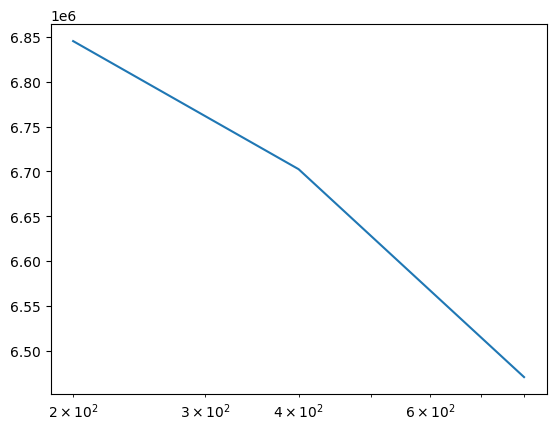

In [19]:
import matplotlib.pyplot as plt

vocab_size = [200, 400, 800]
text_size = [6845524, 6702503, 6470342]

plt.plot(vocab_size, text_size)
plt.xscale('log')
plt.show()

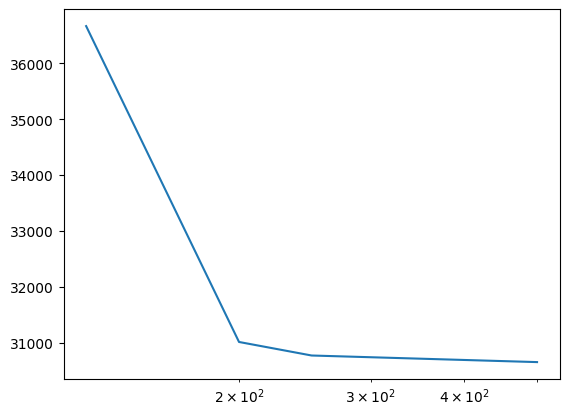

In [9]:
import matplotlib.pyplot as plt

vocab_size = [500, 250, 200, 125]
text_size = [30659, 30777, 31019, 36668]

plt.plot(vocab_size, text_size)
plt.xscale('log')
plt.show()